In [1]:
import pandas as pd
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df = df.drop(columns=['Cabin'])

In [15]:
df['Pclass'] = df['Pclass'].astype('category')

In [16]:
df['Sex'] = df['Sex'].astype('category')

In [17]:
df['Embarked'] = df['Embarked'].astype('category')

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB
None


In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

Matplotlib is building the font cache; this may take a moment.


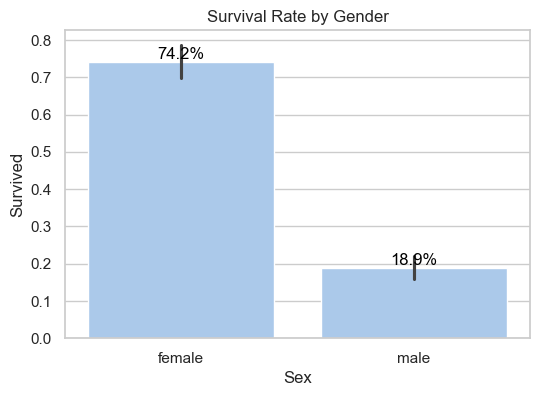

In [ ]:
#Survival Rate by Gender

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Sex', y='Survived', data=df)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=12, color='black')
plt.title("Survival Rate by Gender")
plt.show()

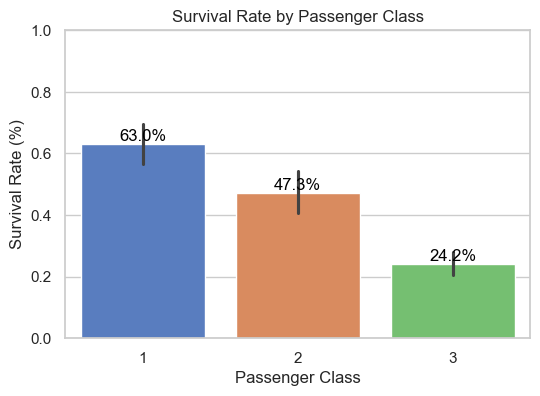

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="muted", legend=False)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Class")
plt.ylim(0,1)
plt.show()


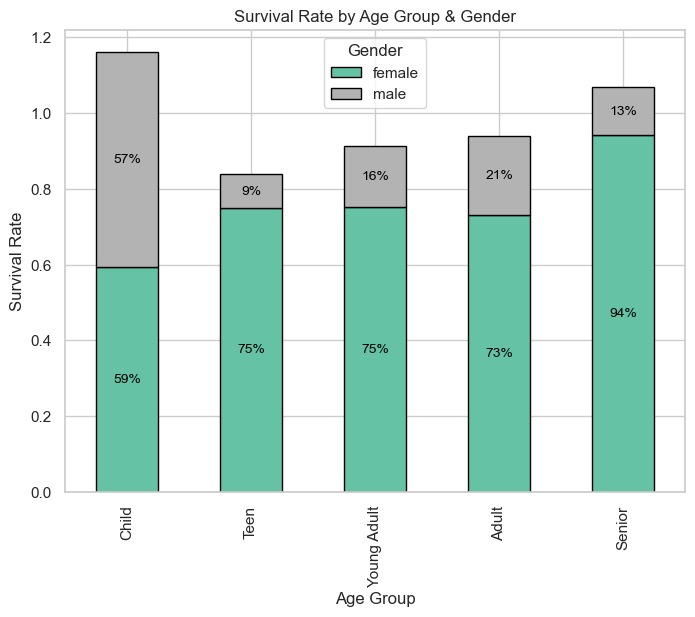

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

survival_age_gender = df.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean().unstack()
ax = survival_age_gender.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set2", edgecolor="black")

plt.title("Survival Rate by Age Group & Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.legend(title="Gender")

for i, age_group in enumerate(survival_age_gender.index):
    cumulative = 0
    for gender in survival_age_gender.columns:
        value = survival_age_gender.loc[age_group, gender]
        if pd.notna(value):  # avoid issues with NaN
            cumulative += value
            ax.text(i, cumulative - value/2, 
                    f"{value:.0%}", ha="center", va="center", fontsize=10, color="black")

plt.show()


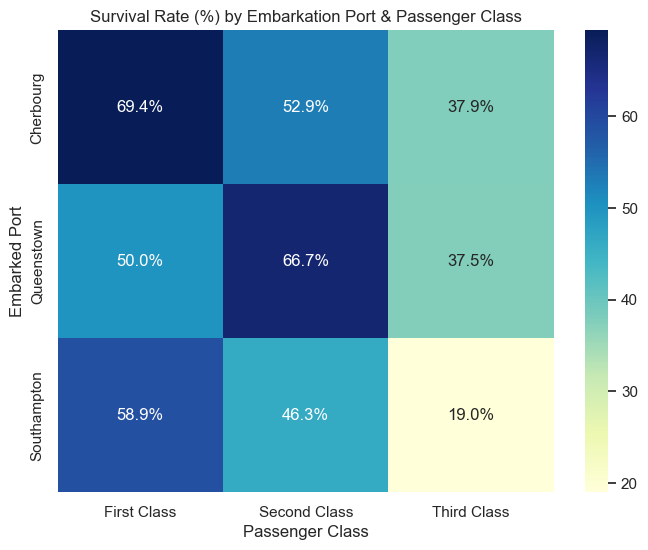

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Embarked'] = df['Embarked'].cat.rename_categories({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})
df['Pclass'] = df['Pclass'].cat.rename_categories({
    1: 'First Class',
    2: 'Second Class',
    3: 'Third Class'
})
embarked_pclass = df.groupby(['Embarked', 'Pclass'], observed=True)['Survived'].mean().unstack()*100

plt.figure(figsize=(8,6))
sns.heatmap(embarked_pclass, annot=True, fmt=".1f%%", cmap="YlGnBu", cbar=True)
plt.title("Survival Rate by Embarkation Port & Passenger Class")
plt.ylabel("Embarked Port")
plt.xlabel("Passenger Class")
plt.show()


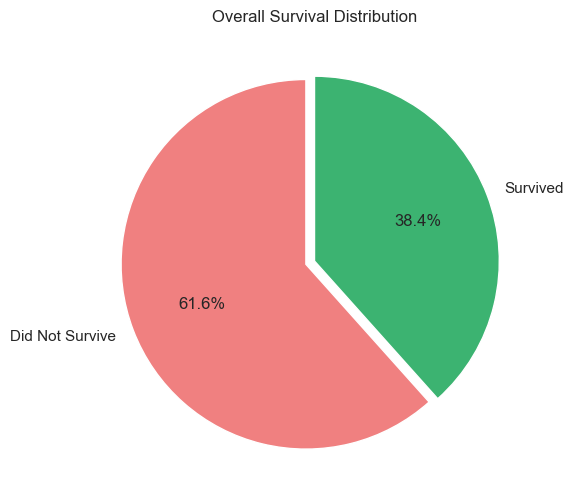

In [ ]:
import matplotlib.pyplot as plt

survival_counts = df['Survived'].value_counts()

labels = ["Did Not Survive", "Survived"]

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=['lightcoral', 'mediumseagreen'], 
        explode=(0.05, 0))
plt.title("Overall Survival Distribution")
plt.show()


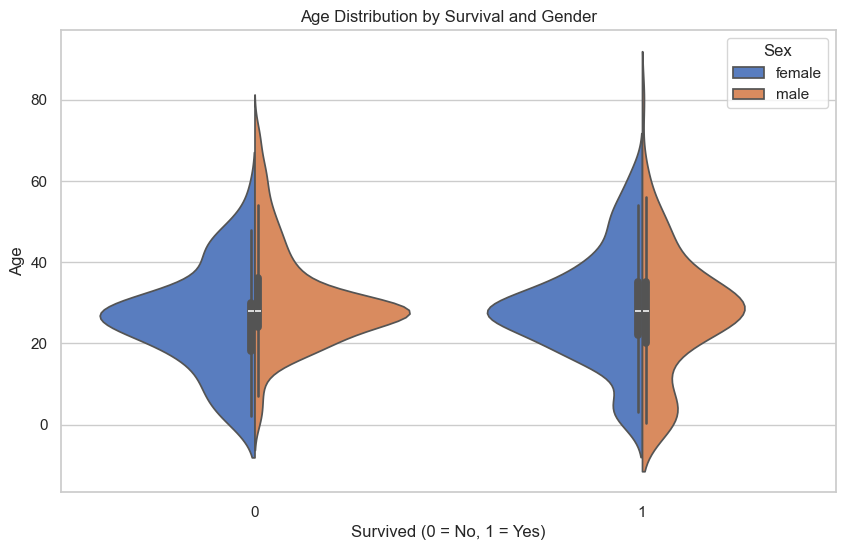

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=df, split=True, palette="muted")

plt.title("Age Distribution by Survival and Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Sex")
plt.show()
